# EJEMPLO

Vamos a ver un ejemplo de clasificación de imagenes mediante redes neuronales en el contexto de la clasificación multiclase para los datos Fashion-Minst. 

Fashion-MNIST es un conjunto de datos de imágenes de ropa y accesorios, utilizado para tareas de clasificación de imágenes (estos datos los podemos encontrar en tf.keras.datasets)

## Paso1: Importar librerías 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten

2024-12-11 22:34:46.885130: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Paso 2: Preparación de los datos

Se prepara la estructura de un gráfico que ayudará a la comprensión de los datos a lo largo del proceso

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de un conjunto de entrenamiento de 60000 ejemplos y un conjunto de prueba de 10000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada con una etiqueta de 10 clases diferentes.

In [3]:
#Función de carga de datos Fasion MNIST 
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

## Paso 3: División de los datos

Cargamos los datos y el conjunto de entrenamiento lo vamos a dividir en dos conjuntos, el conjunto de entrenamiento y el conjunto de validación con 5000 elementos

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

#Dividimos los datos completos de entrenamiento en datos de entrenamiento y validación
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [5]:
#Obtenemos la forma del conjunto de entrenamiento completo. 
#En este caso es de 28x28 pixeles en escala de grises (1 canal)    
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train.shape

(55000, 28, 28)

In [7]:
X_valid.shape

(5000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  


Vamos a escalar las intensidades de los píxeles al rango de 0-1 y convertirlas a flotantes, dividiendo entre 255
+ Normalización para las imagenes: Dividir cada valor de píxel por 255 normaliza las intensidades al rango de 0 a 1. 
Normalizar los datos es una práctica común en el aprendizaje automático porque ayuda a que el modelo converja más rápido durante el entrenamiento. Además, puede mejorar la estabilidad y el rendimiento del modelo.

+ Tipo de datos flotante: Convertir los valores a flotantes es importante porque muchos modelos de aprendizaje automático esperan datos en formato de punto flotante. La mayoría de las operaciones y optimizadores en las bibliotecas de aprendizaje profundo están optimizados para trabajar con números de punto flotante.

In [10]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

Vamos a dibujar una de las imagenes mediante matplotlib

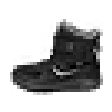

In [11]:
plt.figure(figsize=(1.2, 1.2))
plt.imshow(X_train[0], cmap="binary",interpolation="nearest")
plt.axis('off')
plt.show()

Las etiquetas son los IDs de clase, desde 0 hasta 9:

In [12]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Aquí tenemos sus correspondientes nombres de clases:

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Ankle boot'

Vamos a echar un vistazo a alguna imagen más de nuestro dataset:

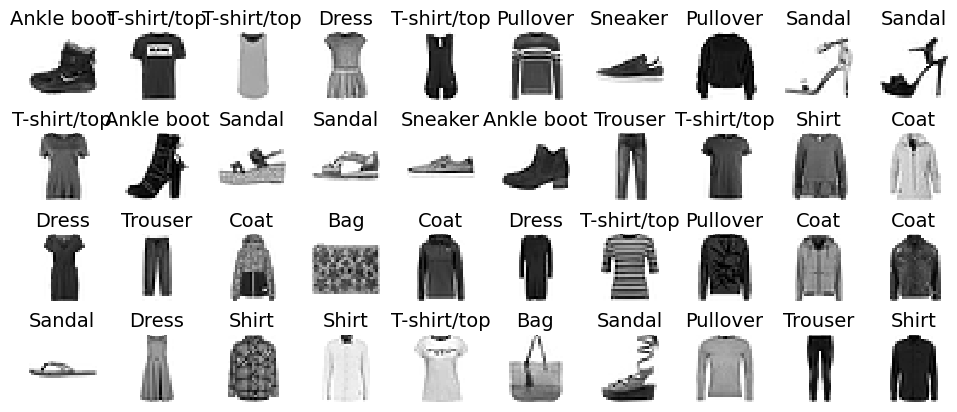

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Paso 4: Creación del modelo 

Capas:
+ Sequential: un modelo lineal para construir redes neuronales de manera secuencial capa por capa. Es una de las maneras más sencillas de crear y entrenar modelos en Keras. 
+ Flatten:  transformar una matriz o tensor multidimensional en un vector unidimensional, conservando todos los elementos en el mismo orden. Esta operación es comúnmente utilizada como capa de preprocesamiento en una red neuronal antes de pasar la información a capas totalmente conectadas.
+ Funciones de activación:
    + relu: Las primeras dos capas ocultas utilizarán la función de activación 'relu'. La primera de ellas con 300 neuronas y la segunda sobre 100. 
    + softmax: La última capa de 10 neuronas utiliza la función 'softmax'. La función de activación softmax es comúnmente utilizada en la capa de salida de la red neuronal de clasificación multiclase.

##### OPCIÓN 1

In [16]:
# Limpiar la sesión actual y liberar recursos
tf.keras.backend.clear_session()

tf.random.set_seed(42)

model = Sequential()
model.add( Input(shape=(28, 28)))
model.add(Flatten())
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

##### OPCIÓN 2

In [17]:
# Limpiar la sesión actual y liberar recursos
tf.keras.backend.clear_session()

tf.random.set_seed(42)

model = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(300, activation="relu"),
        Dense(100, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

Fijate de que forma se obtienen los datos de cada capa: 

+ 784*300+300=235500
+ 300*100+100=30100
+ 100*10+10=1010

"tf.keras.utils.plot_model": visualizar la arquitectura de un modelo Keras y guardar la representación gráfica en un archivo de imagen. 

+ Atributos:
    + model: Es el modelo de Keras que deseas visualizar.

    + "Recursos/my_fashion_mnist_model.png": Es la ruta y el nombre del archivo de imagen en el que se guardará la representación gráfica del modelo. Asegúrate de tener un directorio llamado "Datos" existente en tu sistema de archivos para que se pueda guardar el archivo allí.

    + show_shapes=True: Este parámetro indica si se deben mostrar las formas de entrada y salida de cada capa en el gráfico. Configurándolo en True, las formas se incluirán en la visualización.

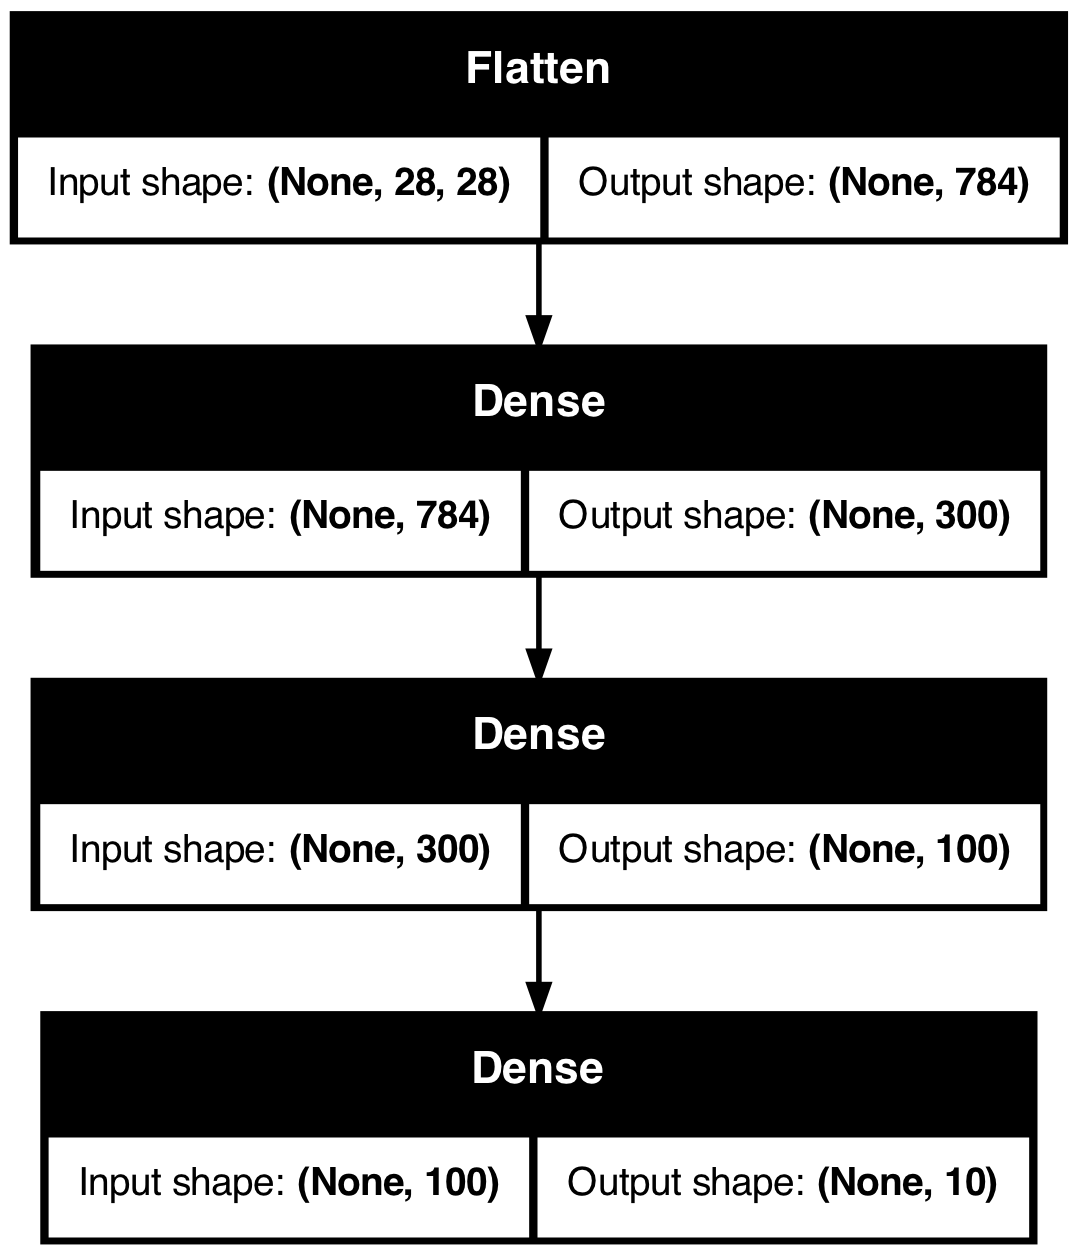

In [19]:
#mostramos el modelo en una imagen 
tf.keras.utils.plot_model(model, "Resultados/my_fashion_mnist_model.png", show_shapes=True)

In [20]:
#mostramos las capas creadas
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [22]:
#mostramos el nombre de la primera capa oculta
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
#mostramos los datos de los pesos y la desviación de la primera capa oculta
weights, biases = hidden1.get_weights()
weights

array([[ 0.06849118, -0.0570084 ,  0.06933157, ..., -0.06941546,
         0.073621  ,  0.04800355],
       [-0.06512699, -0.05265095,  0.05086622, ...,  0.01743945,
         0.01192285, -0.00900856],
       [-0.06581164,  0.00405156,  0.00450114, ..., -0.03934586,
        -0.03734748, -0.01854314],
       ...,
       [-0.05674529, -0.05471103,  0.0129262 , ..., -0.06105738,
        -0.05500402, -0.02515714],
       [ 0.03605308,  0.02637443, -0.04330768, ...,  0.02668554,
         0.00861812, -0.02594972],
       [-0.0721796 ,  0.02027962,  0.0019441 , ...,  0.05734739,
         0.01777481, -0.0022785 ]], dtype=float32)

In [77]:
# mostramos la forma de los pesos 
weights.shape

(784, 300)

Cada neurona en una capa tiene su propio sesgo asociado.La inclusión de sesgos permite que la red neuronal aprenda a ajustar el umbral de activación de cada neurona de forma independiente, además de aprender los pesos que multiplican las entradas.

In [78]:
# mostramos los sesgos, que estan directamente relacionados con los pesos. 
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [79]:
biases.shape

(300,)

In [25]:
#Opción 1
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
#Opción 2
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy])

## Paso 5: Entrenamiento el modelo 

In [29]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2196 - sparse_categorical_accuracy: 0.9233 - val_loss: 0.3511 - val_sparse_categorical_accuracy: 0.8758
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2158 - sparse_categorical_accuracy: 0.9246 - val_loss: 0.3503 - val_sparse_categorical_accuracy: 0.8752
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2122 - sparse_categorical_accuracy: 0.9257 - val_loss: 0.3516 - val_sparse_categorical_accuracy: 0.8758
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2083 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.3510 - val_sparse_categorical_accuracy: 0.8756
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2047 - sparse_categorical_accuracy: 0.9283 - val_loss: 0.3516 - val_sparse_categorical_accuracy: 0.8754
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2010 - sparse_categorical_accuracy: 0.9300 - val_loss: 0.3528 - val_sparse_categorical_accuracy:

In [31]:
# mostramos el historial de entrenamiento 
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

El número 1719 en los parámetros de history después de ejecutar model.fit en Keras indica la cantidad de pasos (batches) por epoch que el modelo ha procesado durante el entrenamiento. Este número sale de dividir el tamaño total del conjunto de datos de entrenamiento por el tamaño del lote (batch_size) utilizado en el entrenamiento. Si el tamaño total del conjunto de datos no es un múltiplo exacto del tamaño del lote, Keras redondea hacia arriba al número entero más cercano para asegurarse de que todos los datos sean utilizados.

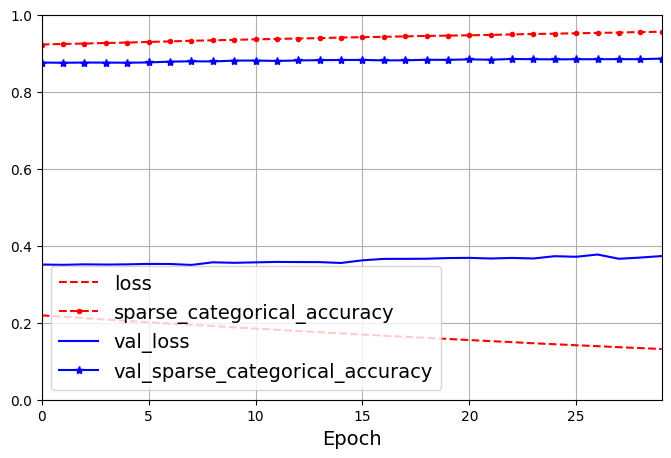

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()


+ El elemento history del modelo entrenado es un registro que contiene las métricas calculadas al final de cada epoch durante el entrenamiento y la validación de un modelo. Este diccionario típicamente incluirá entradas para la pérdida (loss) y las métricas (metrics), que son monitoreadas durante el entrenamiento.

## Paso 6: Evaluación el modelo

In [33]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3946 - sparse_categorical_accuracy: 0.8831


[0.39168810844421387, 0.8823000192642212]

El primer número es el valor promedio de la pérdida en el conjunto de prueba (loss).
El segundo número es la sparse_categorical_accuracy promedio

## Paso 7: Generación de predicciones

In [34]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [87]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [88]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [89]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

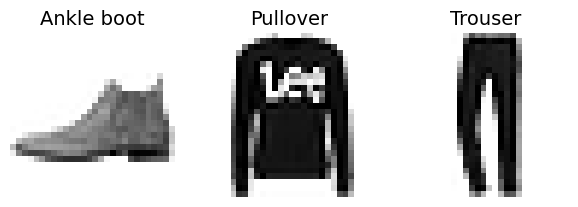

In [90]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## RESUMEN


Paso 2: Preparación de datos

In [91]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

Paso 3: División de datos

In [92]:
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [93]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress", "Coat","Sandal","Shirt", "Sneaker","Bag",
 "Ankle boot"]

Paso 4: Creación del modelo

In [35]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(300, activation="relu"),
        Dense(100, activation="relu"),
        Dense(10, activation="softmax"),
    ]
)

Compilación

In [36]:
model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=[tf.keras.metrics.sparse_categorical_accuracy],
)

Paso 5: Entrenamiento del modelo

In [37]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.0000 - sparse_categorical_accuracy: 0.6815 - val_loss: 0.5044 - val_sparse_categorical_accuracy: 0.8298
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5091 - sparse_categorical_accuracy: 0.8245 - val_loss: 0.4565 - val_sparse_categorical_accuracy: 0.8406
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4548 - sparse_categorical_accuracy: 0.8424 - val_loss: 0.4332 - val_sparse_categorical_accuracy: 0.8458
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4233 - sparse_categorical_accuracy: 0.8522 - val_loss: 0.4181 - val_sparse_categorical_accuracy: 0.8490
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.4011 - sparse_categorical_accuracy: 0.8602 - val_loss: 0.4073 - val_sparse_categorical_accuracy: 0.8526
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.3837 - sparse_categorical_accuracy: 0.8659 - val_loss: 0.3999 - val_sparse_categorical_accuracy:

Paso 6: Evaluación del modelo con los adtos de testing

In [97]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3729 - sparse_categorical_accuracy: 0.8715


[0.37084972858428955, 0.8729000091552734]

Paso 7: Generación de predicciones

In [98]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_pred = y_proba.argmax(axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [99]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

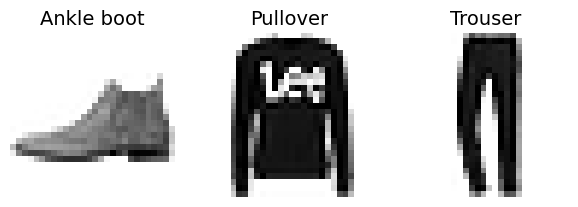

In [100]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()